------------------------
## INFERRING CAUSAL IMPACT USING BAYESIAN STRUCTURAL TIME-SERIES MODELS
\begin{equation}
Google. Inc.
\end{equation}



 * This paper proposes to infer causal impact 
on the basis of a diffusion-regression state-space model that predicts the counterfactual
market response in a synthetic control that would have occurred had no intervention taken place.

##Contents
* ### Preview
* ### Overview
* ### Bayesian structural time-series model
* ### How the package works
* ### A simple example

## Preview

### Q. 주어진 data $X$에서 모형 파라미터 $\theta$를 찾아낸다?

A.1 기존의 추정 방법론 (Batch estimation)
* $X$만을 사용하여 파라미터 $\theta$ 추정
* MLE (Maximum Likelihood Estimation)
* likelihood를 최대화하는 $\theta$를 찾는 최적화 문제
>결정론적 추정 방법론 :
\begin{eqnarray*}
        y \sim N(\mu, 1)
      \end{eqnarray*}
의 샘플데이터 $\{ y_i \}$로부터 $\mu$값을 추정 (point estimation)


A.2 베이지안 추정 (Bayesian estimation)
* a prior 파라미터 분포 $P(\theta)$와 $X$을 사용하여 파라미터 분포 $P(\theta|X)$ 추정
* 파라미터 분포에 대한 가정이 필요
* Bayesain Rule에 의해 a prior 분포를 a posterior 분포로 변화
> 베이지안 추정 방법론 :
\begin{eqnarray*}
        y \sim N(\mu, 1), \;\; \mu \sim N(m, C)
\end{eqnarray*}
의 샘플데이터 $\{ y_i \}$로부터 $\mu$의 분포 파라미터 $m$와 $C$를 추정
      
>> 베이지안 추정 방법론에서는 추정할 파라미터가 결정론적으로 정해진 값 (deterministic value)이 아니라 확률분포로 기술되기 때문에 그 파라미터의 분포를 찾아야 한다고 가정한다.


### 상태공간 모형 (State Space Model)

* ARMA 시계열 모형에서는 관측할 수 있는 출력값 $x$자체의 결합확률분포(joint density distribution)을 정의하여 시계열 정보의 변화를 기술


\begin{eqnarray*}
        \pi(x_t | x_1, \ldots, x_{t-1}) 
          = \dfrac{\pi(x_1, \ldots, x_t)}{\pi(x_1, \ldots, x_{t-1})}
\end{eqnarray*}
      
      
* ${\bf 상태공간 모형}$에서는 보이지 않은 상태변수(state) $\theta$의 결합확률분포를 정의하여 시계열 정보의 변화를 기술


\begin{eqnarray*}
        \pi(\theta_t | \theta_1, \ldots, \theta_{t-1}) 
          = \dfrac{\pi(\theta_1, \ldots, \theta_t)}{\pi(\theta_1, \ldots, \theta_{t-1})}
\end{eqnarray*}


* 상태공간 모형에서 사람이 관측할 수 있는 것은 상태변수 $\theta$ 자체가 아닌 상태변수에 의존하는 출력(measurements) $y$ 라고 가정. 이 때 상태공간 모형에서 상태변수 $\theta$와 출력 $y$의 관계는 다음과 같은 추가적인 조건부 확률분포에 의해 정의됨


\begin{eqnarray*}
        \pi(y_t | \theta_t)
\end{eqnarray*}


* 상태변수는 베이지안 추정방법에서 추정하려는 파라미터에 해당
    
    

<figure id="fig.redline0" style="float: none"><img src="files/fig.png"><figcaption> 
</figcaption></figure>

## Overview

#### How can we measure the number of additional clicks or sales that an AdWords campaign generated? 

####How can we estimate the impact of a new feature on app downloads? 
####How do we compare the effectiveness of publicity across countries?

> ### In principle, all of these questions can be answered through $causal~ inference(인과추론)$.

| 꼬젯's comments |



 데이터 분석이 흥하면서, 한동안 잠잠하던 시계열 예측 분석이 다시 주목받고 있다. 이 시계열 예측 분석이 침체기였던 이유는, 보통 실제로 어떤 사건이 발생함에 있어서 수많은 실험에서의 가정처럼 '독립적'인 경우가 많지 않은지라, 단일한 시계열로 그 이후를 예측할 때 그 결과가 믿을 만한 경우가 (실험적으로야 잘 나온다 하더라도) 그다지 많지 않기 때문이다. 그래서 실제로 수요 예측 등의 용도로 시뮬레이션은 그럭저럭 하면서도, 여기에 실제 현상을 어떻게 잘 녹여넣을까에 대한 숙제는 항상 있어왔다. 그리고 보통 시간의 흐름에 따라서 영향을 미치다보니, 이런 영향력을 미치는 인자 간의 '상관성'보다는 '인과성'에 보다 초점을 맞추게 된다. 구글에서는 베이지안 방식으로 인과 추론(causal inference)을 하는 예측 모델 방법론(Bayesian structural time-series model)을 만들었다.

## Bayesian structural time-series model

In practice, estimating a causal effect accurately is hard, especially when a randomised experiment is not available. One approach we've been developing at Google is based on $Bayesian~ structural~ time~series ~models$. 

We use these models to construct a synthetic control — what would have happened to our outcome metric in the absence of the intervention. This approach makes it possible to estimate the causal effect that can be attributed to the intervention, as well as its evolution over time.

 We've been testing and applying structural time-series models for some time at Google. For example, we've used them to better understand the effectiveness of advertising campaigns and work out their return on investment. We've also applied the models to settings where a randomised experiment was available, to check how similar our effect estimates would have been without an experimental control.

 Today, we're excited to announce the release of CausalImpact, an open-source R package that makes causal analyses simple and fast. With its release, all of our advertisers and users will be able to use the same powerful methods for estimating causal effects that we've been using ourselves.

 Our main motivation behind creating the package has been to find a better way of measuring the impact of ad campaigns on outcomes. However, the CausalImpact package could be used for many other applications involving causal inference. Examples include problems found in economics, epidemiology, or the political and social sciences.

| 꼬젯's comments |


여기서 사용하는 방법을 간단히 설명하면, 각각의 상태를 일종의 state-space model(간단하게 hidden markov chain 같은 모델이라고 생각하면 된다) 로 만든 후에 이에 대한 상태 변화 예측 모델을 만들고, 베이지안 방법론을 사용하여 사후 추론 내용에 대한 신뢰구간을 만들어서 제공하는 방식이다. 일반적으로 예측 요인-결과의 시계열 데이터를 사용하여, 특정 구간을 중심으로 해서 training-test 로 시계열을 나누고, test의 부분을 예측하는, 보통 흔히 사용하는(?) forecasting 방식이다. 다만 여러 변수를 동시에 사용해서 사전 요인으로 사용해서 이 요인들이 실제로 얼마나 영향을 끼치는지, 서로 어떻게 영향을 끼쳐서 이로 인해서 어떤 식으로 움직일 지를 예측할 수 있다고 하니, 일반적으로 실무에서 시계열 예측 분석을 사용하면서 고민하는 중요한 점들이 어느 정도 해소될 수 있을 것이다. (상세한 수식 등은 적기도 힘들고 나도 100% 이해하지는 못한 지라(...) 적지는 않겠다. 간만에 논문 보려니 머리 깨지겠더라.)

## How the package works

The CausalImpact R package implements a Bayesian approach to estimating the causal effect of a designed intervention on a time series. Given a response time series (e.g., clicks) and a set of control time series (e.g., clicks in non-affected markets, clicks on other sites, or Google Trends data), the package constructs a Bayesian structural time-series model with a built-in spike-and-slab prior for automatic variable selection. This model is then used to predict the counterfactual, i.e., how the response metric would have evolved after the intervention if the intervention had not occurred.

 As with all methods in causal inference, valid conclusions require us to check for any given situation whether key model assumptions are fulfilled. In the case of CausalImpact, we are looking for a set of control time series which are predictive of the outcome time series in the pre-intervention period. In addition, the control time series must not themselves have been affected by the intervention. For details, see Brodersen et al. (2014).


## A simple example
http://google.github.io/CausalImpact/CausalImpact.html#creating-an-example-dataset

1. Installing the package
--

In [1]:
install.packages("devtools")
library(devtools)
devtools::install_github("google/CausalImpact")
library(CausalImpact)

Installing package into 'C:/Users/duki/Documents/R/win-library/3.1'
(as 'lib' is unspecified)


ERROR: Error in contrib.url(repos, "source"): trying to use CRAN without setting a mirror



Please download and install Rtools 3.2 from http://cran.r-project.org/bin/windows/Rtools/ and then run find_rtools().
Installing CausalImpact
Installing 2 packages: DBI, proto


package 'DBI' successfully unpacked and MD5 sums checked
package 'proto' successfully unpacked and MD5 sums checked


"C:/Anaconda/R/bin/x64/R" --no-site-file --no-environ --no-save --no-restore  \
  CMD INSTALL  \
  "C:/Users/duki/AppData/Local/Temp/RtmpoVES9q/devtools2158ee624f0/google-CausalImpact-9c9286f"  \
  --library="C:/Users/duki/Documents/R/win-library/3.1" --install-tests 

Loading required package: bsts
Loading required package: BoomSpikeSlab
Loading required package: Boom
Loading required package: MASS
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: xts

Attaching package: 'bsts'

The following object is masked from 'package:Boom':

    PlotDynamicDistribution



In [2]:
library(devtools)

In [3]:
library(CausalImpact)

2. Creating an example dataset
--

To illustrate how the package works, we create a simple toy dataset. It consists of a response variable y and a predictor x1. Note that in practice, we’d strive for including many more predictor variables and let the model choose an appropriate subset. The example data has 100 observations. We create an intervention effect by lifting the response variable by 10 units after timepoint 71.

In [10]:
set.seed(1)
x1 <- 100 + arima.sim(model = list(ar = 0.999), n = 100)
y <- 1.2 * x1 + rnorm(100)
y[71:100] <- y[71:100] + 10
data <- cbind(y, x1)

In [11]:
dim(data)

[1] 100   2

In [12]:
head(data)

y,x1
105.295,88.21513
105.8943,88.48415
106.6209,87.87684
106.1572,86.77954
101.2812,84.62243
101.4484,84.6065


ERROR: Error in replayPlot(obj): invalid graphics state


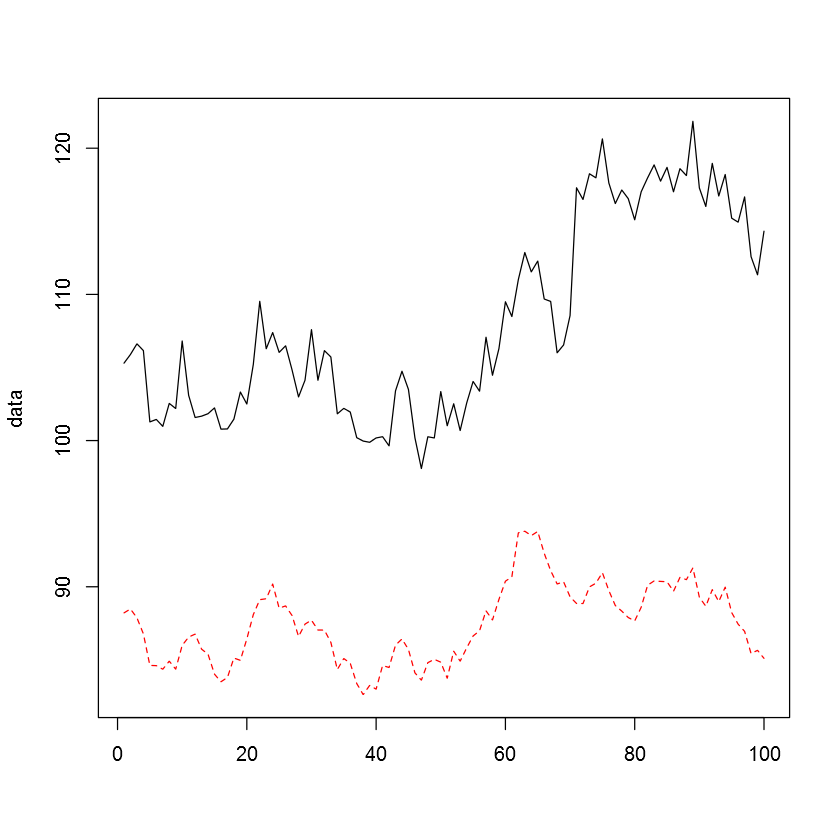

In [13]:
matplot(data, type = "l")

3. Running an analysis
--

To estimate a causal effect, we begin by specifying which period in the data should be used for training the model (pre-intervention period) and which period for computing a counterfactual prediction (post-intervention period).

In [31]:
pre.period <- c(1, 70)
post.period <- c(71, 100)

This says that time points 1 … 70 will be used for $training$, and time points 71 … 100 will be used for $computing ~predictions(ie. test)$. 
    
    
To perform inference, we run the analysis using:


In [32]:
impact <- CausalImpact(data, pre.period, post.period)

This instructs the package to assemble a structural time-series model, perform posterior inference, and compute estimates of the causal effect. The return value is a CausalImpact object.

4. Plotting the results
--

ERROR: Error in if (args[[1]]$name == "C_title" && !is.null(args[[2]])) {: TRUE/FALSE가 필요한 곳에 값이 없습니다


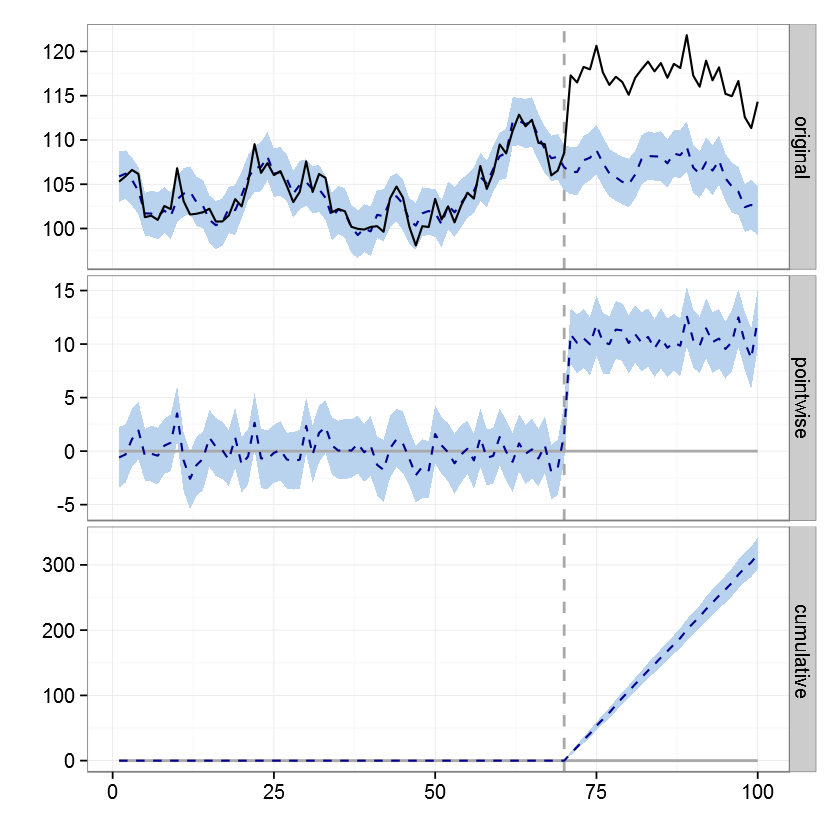

In [9]:
plot(impact)

> 가장 위의 `original`은 원 데이터와 예측 데이터의 결과값을 보여주고 있고,
가운데는 실제 데이터와 예측 데이터의 차이를 각 시점별로 나타낸 것이고,
가장 아래는 각 시점의 차이의 누적값을 나타낸다.

By default, the plot contains three panels. The first panel shows the data and a counterfactual prediction for the post-treatment period. The second panel shows the difference between observed data and counterfactual predictions. This is the pointwise causal effect, as estimated by the model. The third panel adds up the pointwise contributions from the second panel, resulting in a plot of the cumulative effect of the intervention.

Remember, once again, that all of the above inferences depend critically on the assumption that the covariates were not themselves affected by the intervention. The model also assumes that the relationship between covariates and treated time series, as established during the pre-period, remains stable throughout the post-period.


5. Working with dates and times
--

It is often more natural to feed a time-series object into CausalImpact() rather than a data frame. For example, we might create a data variable as follows:

In [14]:
time.points <- seq.Date(as.Date("2014-01-01"), by = 1, length.out = 100)
data <- zoo(cbind(y, x1), time.points)
head(data)

                  y       x1
2014-01-01 105.2950 88.21513
2014-01-02 105.8943 88.48415
2014-01-03 106.6209 87.87684
2014-01-04 106.1572 86.77954
2014-01-05 101.2812 84.62243
2014-01-06 101.4484 84.60650

We can now specify the pre-period and the post-period in terms of time points rather than indices:

In [11]:
pre.period <- as.Date(c("2014-01-01", "2014-03-11"))
post.period <- as.Date(c("2014-03-12", "2014-04-10"))

As a result, the x-axis of the plot shows time points instead of indices:

ERROR: Error in if (args[[1]]$name == "C_title" && !is.null(args[[2]])) {: TRUE/FALSE가 필요한 곳에 값이 없습니다


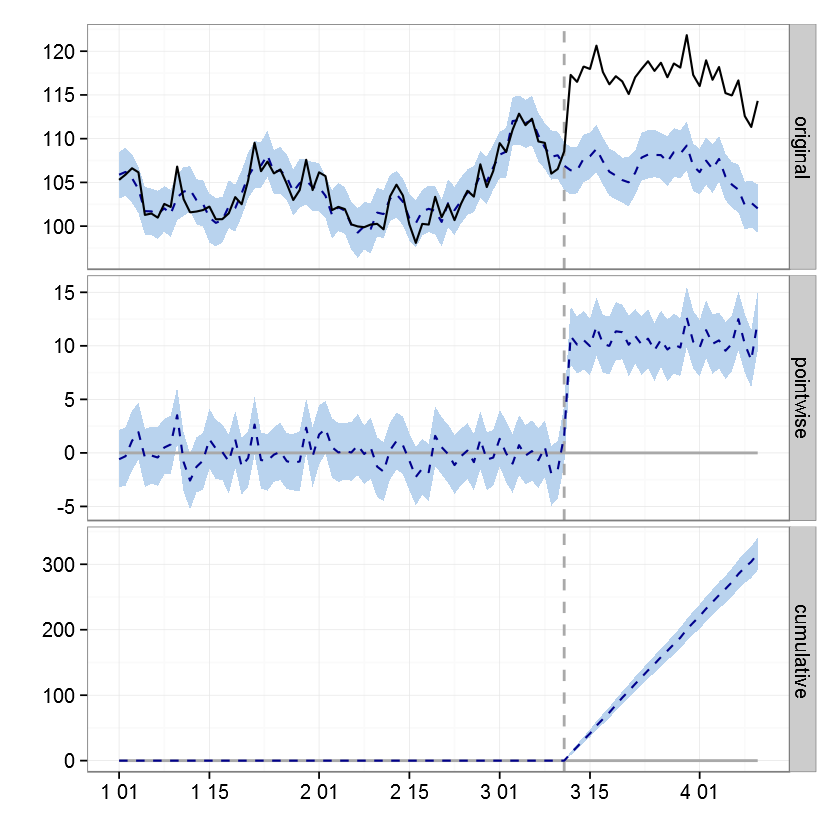

In [12]:
impact <- CausalImpact(data, pre.period, post.period)
plot(impact)

6. Printing a summary table
--

To obtain a numerical summary of the analysis, we use:

In [13]:
summary(impact)

Posterior inference {CausalImpact}

                         Average        Cumulative  
Actual                   117            3511        
Prediction (s.d.)        107 (0.42)     3195 (12.47)
95% CI                   [106, 107]     [3171, 3220]
                                                    
Absolute effect (s.d.)   11 (0.42)      316 (12.47) 
95% CI                   [9.7, 11]      [291.2, 341]
                                                    
Relative effect (s.d.)   9.9% (0.39%)   9.9% (0.39%)
95% CI                   [9.1%, 11%]    [9.1%, 11%] 

Posterior tail-area probability p:   0.00111
Posterior prob. of a causal effect:  99.88901%

For more details, type: summary(impact, "report")



이는 post.period의 예측 값에 대한 평균과 누적값에 대한 실제 값과 예측값, CI(Confidence Interval) 등을 보여준다. effect의 CI 구간에 0이 포함되지 않는 것으로 볼 때 x 변수가 응답 변수 y에 인과적 영향력을 주고 있다.

물론 모델을 기본형 이상으로 커스터마이징도 가능하다. CausalImpact 함수 자체에도 레벨,데이터 스케일링 등의 전처리, state-machine 진행 횟수 및 크기, 계절성 추가 등의 옵션이 있고, 기본적으로 CausalImpact 함수에서 제공하는 베이지안 모델이 아니라, 가지고 있는 데이터로 직접 시계열 데이터를 베이지안 모델로 만들어서 이를 사용해서 CausalImpact 함수에 적용할 수도 있다.


The Average column talks about the average (across time) during the post-intervention period (in the example: time points 71 through 100). The Cumulative column sums up individual time points, which is a useful perspective if the response variable represents a flow quantity (such as queries, clicks, visits, installs, sales, or revenue) rather than a stock quantity (such as number of users or stock price).

In the example, the estimated average causal effect of treatment was 11 (rounded to a whole number; for full precision see impact$summary). This is because we observed an average value of 99 but would have expected an average value of only 89. The 95% posterior interval of the average effect is [9.8, 11]. Since this excludes 0, we (correctly) conclude that the intervention had a causal effect on the response variable. Since we generated the data ourselves, we know that we injected a true effect of 10, and so the model accurately recovered ground truth. One reason for this is that we ensured, by design, that the covariate x1 was not itself affected by the intervention. In practice, we must always reason whether this assumption is justified.

For additional guidance about the correct interpretation of the summary table, the package provides a verbal interpretation, which we can print using:


In [15]:
summary(impact, "report")

Analysis report {CausalImpact}


During the post-intervention period, the response variable had an average value of approx. 117. By contrast, in the absence of an intervention, we would have expected an average response of 107. The 95% interval of this counterfactual prediction is [106, 107]. Subtracting this prediction from the observed response yields an estimate of the causal effect the intervention had on the response variable. This effect is 11 with a 95% interval of [10, 11]. For a discussion of the significance of this effect, see below.

Summing up the individual data points during the post-intervention period (which can only sometimes be meaningfully interpreted), the response variable had an overall value of 3.51K. By contrast, had the intervention not taken place, we would have expected a sum of 3.2K. The 95% interval of this prediction is [3.17K, 3.22K].

The above results are given in terms of absolute numbers. In relative terms, the response variable showed an increase of

The individual numbers in the table, at full precision, can be accessed using:

In [16]:
impact$summary

,Actual,Pred,Pred.lower,Pred.upper,Pred.sd,AbsEffect,AbsEffect.lower,AbsEffect.upper,AbsEffect.sd,RelEffect,RelEffect.lower,RelEffect.upper,RelEffect.sd,alpha,p
Average,117.0485,106.5074,105.6936,107.3405,0.4156072,10.5411,9.708016,11.35493,0.4156072,0.09897059,0.09114873,0.1066116,0.003902143,0.05,0.001109878
Cumulative,3511.456,3195.222,3170.808,3220.215,12.46822,316.2331,291.2405,340.6479,12.46822,0.09897059,0.09114873,0.1066116,0.003902143,0.05,0.001109878


7. Adjusting the model
--

So far, we’ve simply let the package decide how to construct a time-series model for the available data. However, there are several options that allow us to gain a little more control over this process. These options are passed into model.args as individual list elements, for example:

In [19]:
impact <- CausalImpact(..., model.args = list(niter = 5000, nseasons = 7))

ERROR: Error: must either provide data, pre.period, post.period, model.args; or bsts.model and post.period.response


8. Using a custom model
--

--------------------



---------------------------
## Conclusion

다양한 시계열 분석 방법이 있지만, 베이지안 구조를 사용해서 요인 변수를 적절히 활용하여 이 요인들의 효과와 이를 활용한 조건부 추론을 간단하게 만들 수 있는 패키지다.